In [89]:
import matplotlib.pyplot as plt
import numpy as np
from traffic_template import *

plt.style.use('default')


### Flowrate over time

Text(33.722222222222214, 0.5, 'Flow rate')

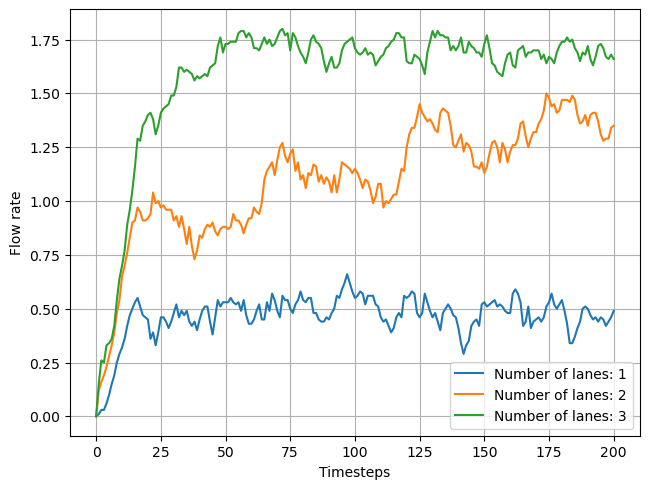

In [95]:
# Simulation parameters
numCars = 20
roadLength = 100
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
numsteps = 200
p = 0.25
right_overtaking = True

# Run simulation
#plt.figure(figsize=(6, 4))
for lanes in lanes_values:
    cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
    simulation = Simulation(cars)
    simulation.run(propagator=MyPropagator(p=p, right_overtaking=right_overtaking), numsteps=numsteps)

    data = simulation.obs

    plt.plot(data.time, data.flowrate, label=f"Number of lanes: {lanes}")


plt.legend()
plt.tight_layout()
plt.grid()
plt.xlabel("Timesteps")
plt.ylabel("Flow rate")


### Fundamental diagrams

1/3
2/3
3/3


Text(42.597222222222214, 0.5, 'Average flow rate')

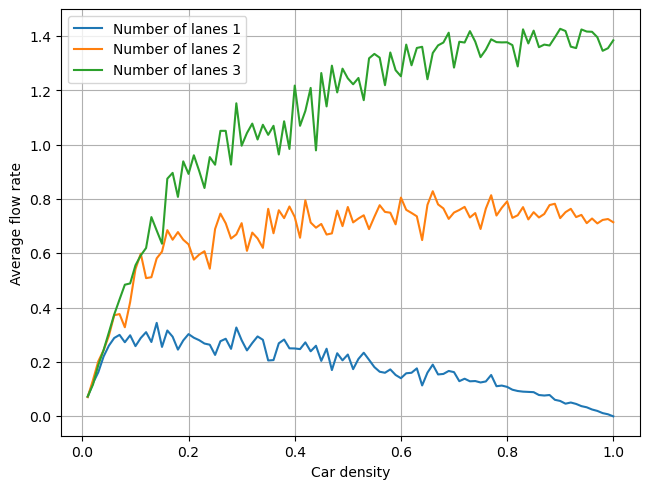

In [94]:
# Set simulation parameters
numCars_values = np.arange(1, 101, 1)
roadLength = 100
car_density_values = numCars_values/roadLength
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
p = 0.2
numsteps = 20

# Run simulation
#plt.figure(figsize=(6, 4))
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    flowrate_values = []
    for numCars in numCars_values:
        cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
        simulation = Simulation(cars)
        simulation.run(propagator=MyPropagator(p=p), numsteps=numsteps)

        data = simulation.obs

        avg_flowrate = np.mean(data.flowrate[-50:])

        flowrate_values.append(avg_flowrate)
    results.append(flowrate_values)
time = data.time

# Plot results
for fr, lanes in zip(results, lanes_values):
    plt.plot(car_density_values, fr, label=f"Number of lanes {lanes}")

plt.legend()
plt.tight_layout()
plt.grid()
plt.xlabel("Car density")
plt.ylabel("Average flow rate")

### RMS fluctuation / standard deviation

1/3
2/3
3/3


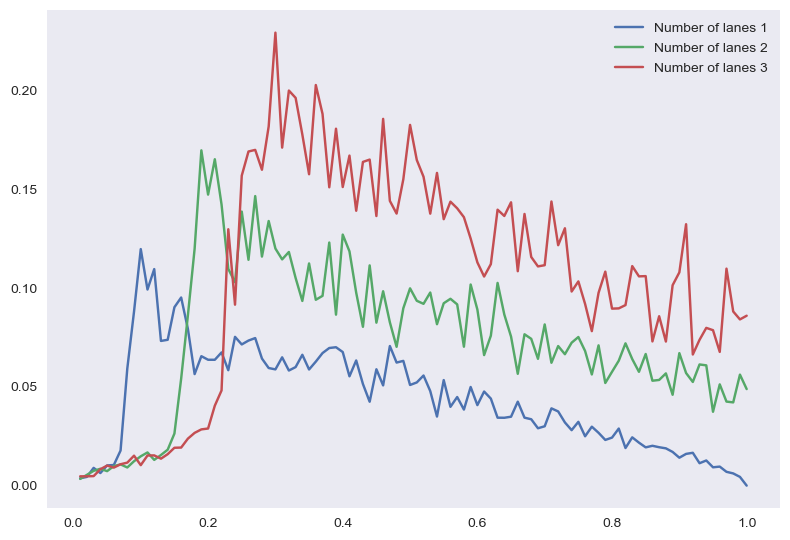

In [35]:
# Set simulation parameters
numCars_values = np.arange(1, 101, 1)
roadLength = 100
car_density_values = numCars_values/roadLength
vmax = 10
sigma = vmax/10
lanes_values = [1, 2, 3]
p = 0.2
numsteps = 50
n = 30

# Run simulation
results = []
for i, lanes in enumerate(lanes_values):
    print(f"{i+1}/{len(lanes_values)}")
    std_error_values = []
    for numCars in numCars_values:
        end_flowrate_values = []
        for j in range(n):
            cars = Cars(numCars=numCars, roadLength=roadLength, lanes=lanes, vmax=vmax, sigma=sigma)
            simulation = Simulation(cars)
            simulation.run(propagator=MyPropagator(p=p), numsteps=numsteps)

            data = simulation.obs
            end_flowrate = data.flowrate[-1]
            end_flowrate_values.append(end_flowrate) 
        std_error = np.std(end_flowrate_values)
        std_error_values.append(std_error)
    results.append(std_error_values)

# Plot results
for res, lanes in zip(results, lanes_values):
    plt.plot(car_density_values, res, label=f"Number of lanes {lanes}")
plt.grid()
plt.legend()
plt.tight_layout()
plt.xlabel("Car density")
plt.ylabel("Standard deviation of flow rate")
